# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Dataframe (latest from Instacart)

In [2]:
# Create path 

path = r'/Users/dianaalatriste/Documents/Instacart'

In [3]:
# Check output

path

'/Users/dianaalatriste/Documents/Instacart'

In [5]:
# Import 'order_products_merged_updated2.pkl' as ords_prods_upd

ords_prods_upd = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_products_merged_updated2.pkl'))

In [21]:
# Check shape

ords_prods_upd.shape

(32404859, 24)

In [22]:
# Check columns

ords_prods_upd.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'last_purchase', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_expenses', 'spending_flag', 'user_behaviour',
       'order_frequency_flag'],
      dtype='object')

# 03. Creating a Bar chart

<Axes: >

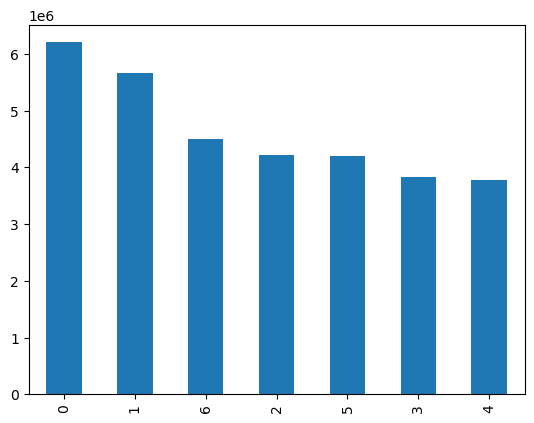

In [6]:
# Create bar chart of 'orders_day_of_week' to observe distribution among categories of the variable

ords_prods_upd['orders_day_of_week'].value_counts().plot.bar()

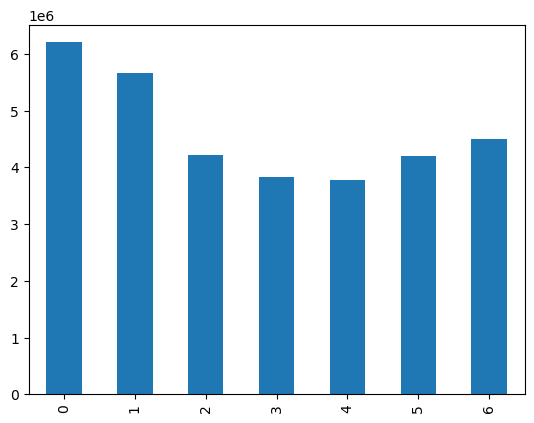

In [7]:
# Change distribution of elements of bar chart with sort_index() function

bar = ords_prods_upd['orders_day_of_week'].value_counts().sort_index().plot.bar()

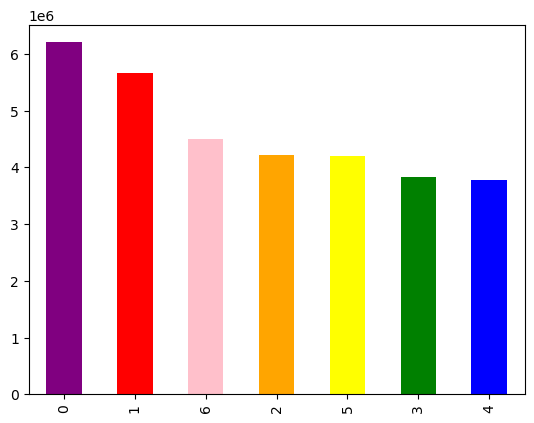

In [8]:
# Adding colors to bars in plot

bar = ords_prods_upd['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

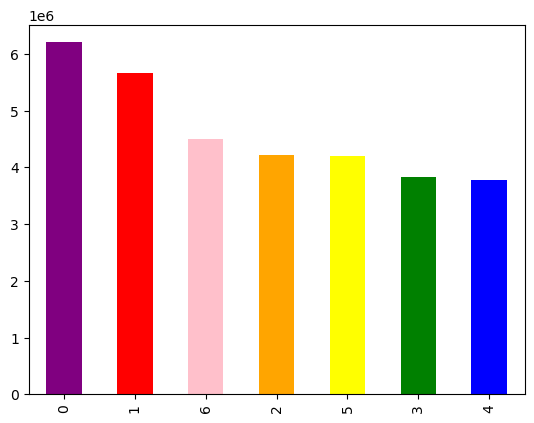

In [9]:
# Calling bar chart

bar.figure

# 04. Exporting chart

In [10]:
# Export bar chart as a png 

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 05. Creating a Histogram

<Axes: ylabel='Frequency'>

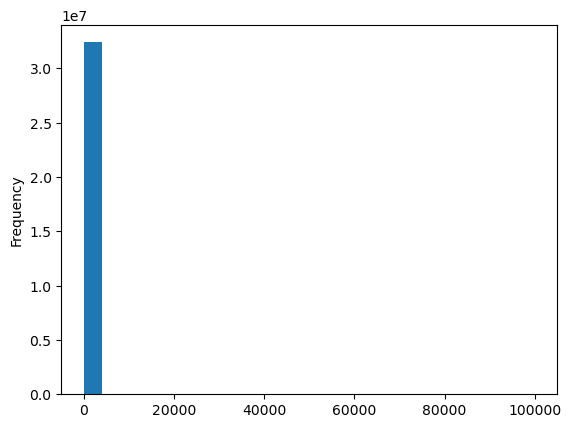

In [12]:
# Create a histogram of the 'prices column'

ords_prods_upd['prices'].plot.hist(bins = 25)

In [13]:
# Analyze why output is just one large column

ords_prods_upd['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
# Maximum value seems off. Check each specific statistic values. Starting with MEAN

ords_prods_upd['prices'].mean()

11.980225638383454

In [15]:
# Check MEDIAN value

ords_prods_upd['prices'].median()

7.4

In [16]:
# Check MAXIMUM value

ords_prods_upd['prices'].max()

99999.0

#### The maximum value is quite high. This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking the histogram—having most values between 7 and 12 (see the median and mean) but an extreme value of 99,999 is forcing the histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram displayed above.

# 06. Creating a Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

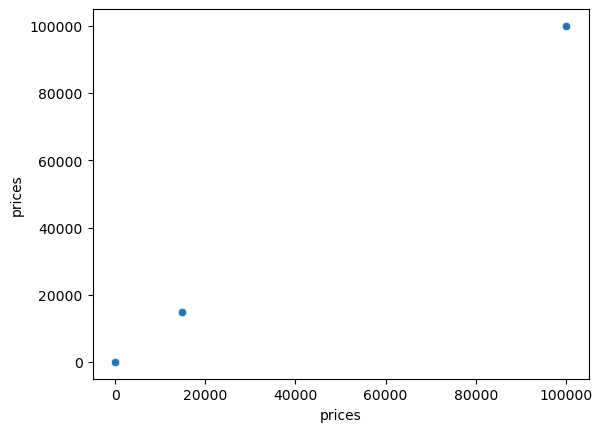

In [17]:
# Create plot for 'prices' column again itself to visualize the distribution of data points to identify outliers

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_upd)

In [18]:
# Again a strange output.
# Check for any values above a certain threshold. Let's say that the maximum price anyone would pay in a supermarket is around 100.

ords_prods_upd.loc[ords_prods_upd['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,last_purchase,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_expenses,spending_flag,user_behaviour,order_frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


#### There are 5,127 rows with outlier observations (prices greater than 100 dolars).

## Dropping eval_set column as is not required and was still present in current dataframe. 

In [19]:
# Drop 'eval_set' column

ords_prods_upd = ords_prods_upd.drop(columns = ['eval_set'])

## Additionally, converting outlier values (>100) in 'prices' columns to NaN's

In [23]:
# Turn outlier values (values above 100) as 'missing' or 'NaN'

ords_prods_upd.loc[ords_prods_upd['prices'] >100, 'prices'] = np.nan

In [24]:
# Check wether replacement was successful by running a max-value check on 'prices column'

ords_prods_upd['prices'].max()

25.0

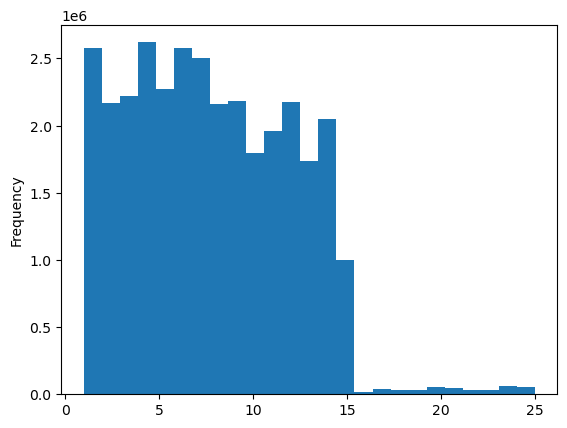

In [25]:
# Retry creating histogram without outliers (25 bins) 

hist = ords_prods_upd['prices'].plot.hist(bins = 25)

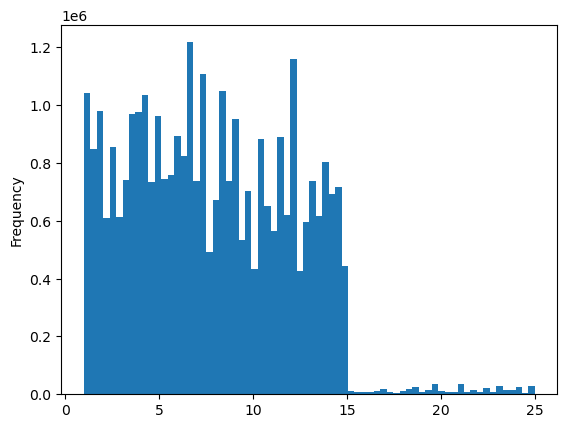

In [26]:
# Plot histogram with 70 bins to increase level of granularity

hist_2 = ords_prods_upd['prices'].plot.hist(bins = 70)

In [27]:
# Export histogram 2 as hist object

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_70bins.png'))

In [28]:
# Export histogram 1 as hist object

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_25bins.png'))

# 07. Creating Line Charts

### First is necessary to sample the data as creating a line chart using all data in dataframe will take a lot of memory usage

# 08. Sampling Data

### Check supplementary documentation on Notion in the corresponding exercise lesson

In [29]:
# Create a list holding True/False values to the test np.random.rand() <= 07

np.random.seed(4)
dev = np.random.rand(len(ords_prods_upd)) <= 0.7

In [31]:
# Store 70% of the sample in the dataframe 'big'

big = ords_prods_upd[dev]

In [32]:
# Store 30% of the sample in the dataframe 'small'

small = ords_prods_upd[~dev]

In [33]:
# Check output by comparing total number og rows in 'ords_prods_upd' and the rows of the sum of 'big'+'small'

len(ords_prods_upd)

32404859

In [34]:
# Check the rows of the sum of 'big'+'small'

len(big) + len(small)

32404859

In [35]:
df_2 = small[['orders_day_of_week', 'prices']]

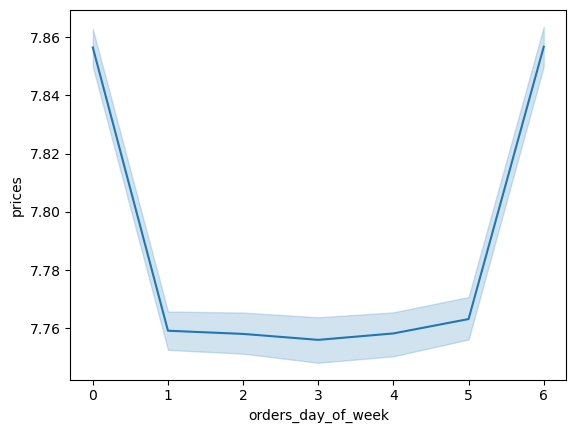

In [36]:
# Create line chart based on data from 'df_2'

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')